In [1]:
import numpy as np
import pandas as pd
df = pd.read_csv('NYPD_Arrest_Data__Year_to_Date_.csv', delimiter = ',')

In [2]:
df.head()

ARREST_KEY ARREST_DATE  PD_CD                                     PD_DESC  \
0   199131647  06/30/2019  109.0                    ASSAULT 2,1,UNCLASSIFIED   
1   199109946  06/30/2019  244.0          BURGLARY,UNCLASSIFIED,UNKNOWN TIME   
2   199131650  06/30/2019  792.0                    WEAPONS POSSESSION 1 & 2   
3   199126329  06/30/2019  922.0            TRAFFIC,UNCLASSIFIED MISDEMEANOR   
4   199127207  06/30/2019  339.0  LARCENY,PETIT FROM OPEN AREAS,UNCLASSIFIED   

   KY_CD                 OFNS_DESC    LAW_CODE LAW_CAT_CD ARREST_BORO  \
0  106.0            FELONY ASSAULT  PL 1200501          F           K   
1  107.0                  BURGLARY  PL 1402000          F           Q   
2  118.0         DANGEROUS WEAPONS  PL 2650303          F           K   
3  348.0  VEHICLE AND TRAFFIC LAWS  VTL05110A2          M           Q   
4  341.0             PETIT LARCENY  PL 1552500          M           K   

   ARREST_PRECINCT  JURISDICTION_CODE AGE_GROUP PERP_SEX       PERP_RACE  \
0               78                  0       <18        M           BLACK   
1              104                  0     25-44        M           BLACK   
2               73                  0     18-24        M           BLACK   
3              104                  0     25-44        M  WHITE HISPANIC   
4               90                  0     45-64        M  WHITE HISPANIC   

   X_COORD_CD  Y_COORD_CD   Latitude  Longitude  
0      988709      187224  40.680570 -73.983925  
1     1011210      191981  40.693587 -73.902781  
2     1007783      185486  40.675770 -73.915162  
3     1017324      198914  40.712596 -73.880699  
4      999701      195491  40.703249 -73.944275

In [3]:
df = df.dropna()
df = df[df.OFNS_DESC != 'DISRUPTION OF A RELIGIOUS SERVICE']
df = df[df.OFNS_DESC != 'UNLAWFUL POSS. WEAP. ON SCHOOL GROUNDS']

In [4]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df)

In [5]:
target = 'OFNS_DESC'
features = ['Latitude','Longitude', 'PERP_RACE', 'PERP_SEX', 'AGE_GROUP', 'ARREST_DATE']

X_train = train[features]
y_train = train[target]

X_test = test[features]
y_test = test[target]

In [6]:
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

In [7]:
pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'), 
    RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
)

pipeline.fit(X_train,y_train)
print('Validation Accuracy', pipeline.score(X_test, y_test))

Validation Accuracy 0.29106546307484543


In [10]:
train, val = train_test_split(train, train_size=0.80, test_size=0.20, 
                              stratify=train['OFNS_DESC'], random_state=42)

In [11]:
target = 'OFNS_DESC'
X_train = train.drop(columns=target)
y_train = train[target]
X_val = val.drop(columns=target)
y_val = val[target]
X_test = test

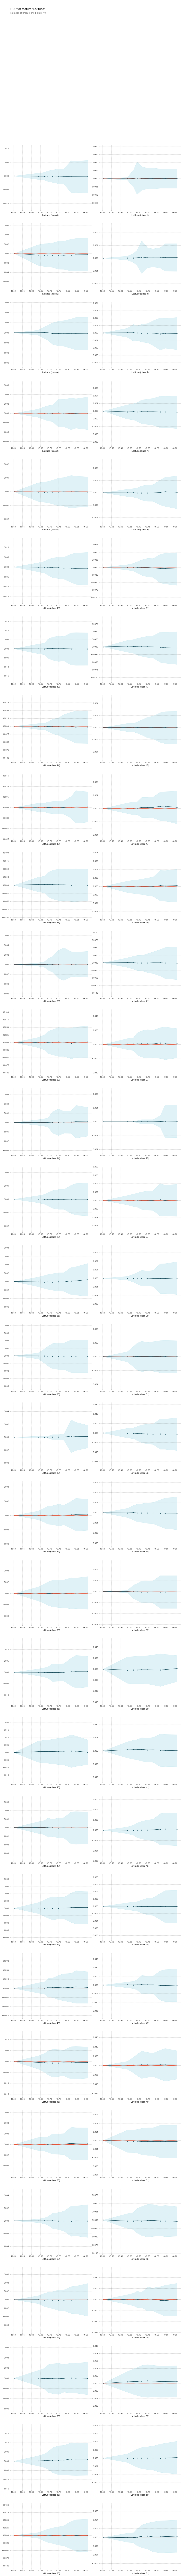

In [18]:
from pdpbox.pdp import pdp_isolate, pdp_plot

feature = 'Latitude'

isolated = pdp_isolate(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    feature=feature
)

pdp_plot(isolated, feature_name=feature);

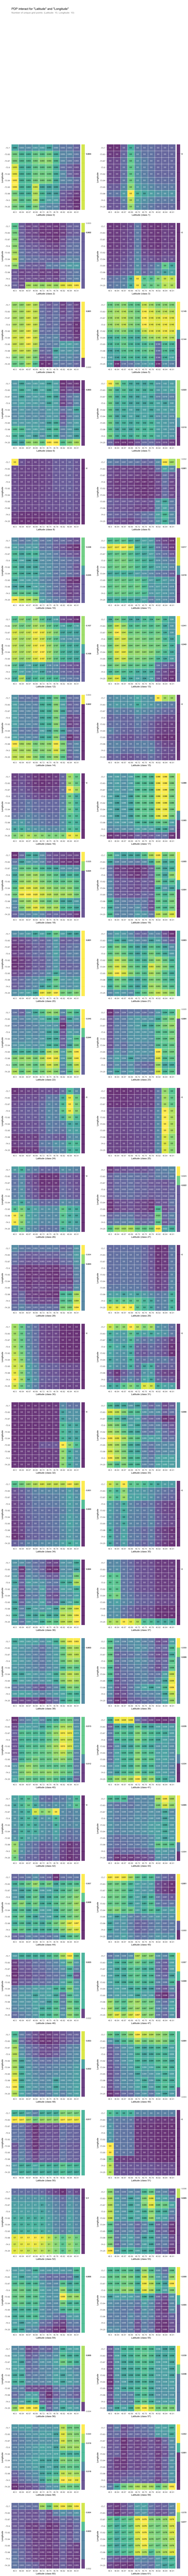

In [19]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

features = ['Latitude', 'Longitude']

interaction = pdp_interact(
    model=gb, 
    dataset=X_val, 
    model_features=X_val.columns, 
    features=features
)

pdp_interact_plot(interaction, plot_type='grid', feature_names=features);